<center>
    <h1>Projeto 2 de Cálculo Numérico</h1>
    <h2>Aproximação Numérica para a Solução de EDOs</h2>
    <hr>
    <h3>
        Gustavo Nascimento Soares<br>
        217530
    </h3>
</center>

## Introdução
   A equação estudada nesse projeto modela um cenário de crescimento populacional em que a taxa de crescimento é proporcional à população existente e à quantidade de recursos disponíveis no meio. Assim, o número de indivíduos y(t) no instante t, é representado pela equação diferencial ordinária:
<img src="eq1.png" alt="drawing" width="250"/>
em que r é a taxa de reprodução da população e K é a constante de capacidade do meio, que é o maior valor atingido pela população para o tempo tendendo ao infinito.
  
  A solução analítica para este problema de valor inicial é dada por
<img src="eq2.png" alt="drawing" width="250"/>
na qual y<sub>0</sub> é o número de indivíduos no instante inicial.

## Metodologia

 Os métodos numéricos utilizados para resolução desse problema de valor inicial são o Método de Euler e o Método de Runge-Kutta de 4ª ordem. Usando o software Python 3.7 e as bibliotecas NumPy e MatPlotLib, foi desenvolvido um script capaz de resolver e visualizar o problema em questão.
### Método de Euler
  Como é conhecido x<sub>0</sub> e y<sub>0</sub> = y(x<sub>0</sub>), é possível calcular y'<sub>0</sub> = f(x<sub>0</sub>, y<sub>0</sub>). Assim, pode-se considerar que a reta que passa por um certo y<sub>k</sub> e y<sub>k+1</sub> tem coeficiente angular f(x<sub>k</sub>, y<sub>k</sub>). Determinando um certo passo h tal que x<sub>k+1</sub> - x<sub>k</sub> = h, o método de Euler fornece:
<img src="eq3.png" alt="drawing" width="350"/> 

### Método de Runge-Kutta
  Aproveita as qualidades dos métodos de série de Taylor, porém não necessita do cálculo de derivadas de f(x, y). Assim, há diferentes métodos de Runge-Kutta que variam com relação à sua ordem. Uma característica desse método, é que após expandir f(x, y) por série Taylor para função de duas variáveis em torno de (x<sub>k</sub>, y<sub>k</sub>) e agrupar os termos semelhantes, sua expressão coincide com o método de série de Taylor de mesma ordem.
  A fórmula para o método de Método de Runge-Kutta de 4ª ordem é a seguinte:
<img src="eq4.png" alt="drawing" width="370"/>

## Código-fonte e Resultados
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Constantes iniciais
r0 = .5 # taxa de reproducao da populacao
K0 = 10 # constante de capacidade do meio
h0 = .05 # passo dos metodos

# Funcao de iteracao
f = lambda r, y, K: r*y*(1-y/K)

### Item a) 
#### Método de Euler com passo 0.05 no intervalo [0, 4]
---

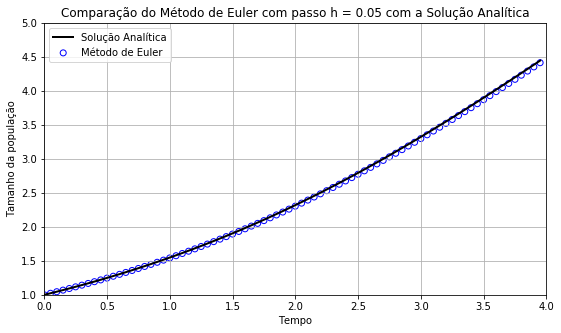

In [2]:
# Arrays das variaveis independentes e dependentes
t_euler = np.arange(0, 4, h0)
y_euler = np.zeros(t_euler.size, dtype=float)
y_euler[0] = 1 # condicao inicial
y_anal = (K0*y_euler[0]*np.exp(r0*t_euler))/(K0+y_euler[0]*(np.exp(r0*t_euler)-1))

# Execucao do metodo
for i in range(1, y_euler.size):
	y_euler[i] = y_euler[i-1] + h0*f(r0, y_euler[i-1], K0)
    
# Plot das curvas
plt.figure(1, figsize=(9,5))
plt.plot(t_euler, y_anal, 'k', linewidth=2, label='Solução Analítica')
plt.scatter(t_euler, y_euler, facecolors='none', edgecolors='b', label='Método de Euler')
plt.xlabel('Tempo')
plt.ylabel('Tamanho da população')
plt.title('Comparação do Método de Euler com passo h = 0.05 com a Solução Analítica')
plt.legend()
plt.grid(True)
plt.axis([0, 4, 1, 5])
plt.show()

### Item b)
#### Método de Euler variando os parâmetros
---

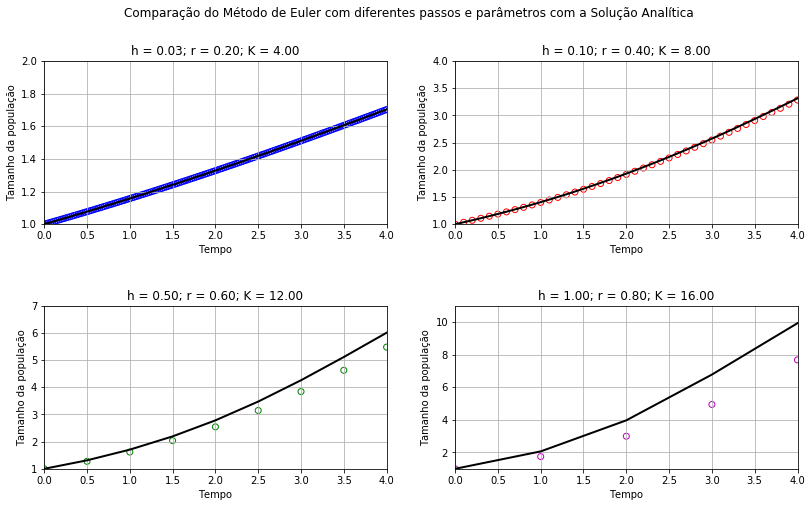

In [18]:
# Novos parametros 
r = np.array([.2, .4, .6, .8])
h = np.array([.025, .1, .5, 1])
K = np.array([4, 8, 12, 16])

# Configuracao do plot
fig = plt.figure(2, figsize=(13.5,7.5))
fig.suptitle('Comparação do Método de Euler com diferentes passos e parâmetros com a Solução Analítica') 
colors = ('b', 'r', 'g', 'm')
max_y = (2, 4, 7, 11)

for i in range(h.size):
    # Arrays das variaveis independentes e dependentes
    t_eulerb = np.arange(0, 4+h[i], h[i])
    y_eulerb = np.zeros((t_eulerb.shape), dtype=float)
    y_eulerb[0] = 1 # condicao inicial
    
    # Execucao do metodo
    for j in range(1, y_eulerb.size):
        y_eulerb[j] = y_eulerb[j-1] + h[i]*f(r[i], y_eulerb[j-1], K[i])
        
    # Plot das curvas
    plt.subplot(221 + i)
    y_anal = (K[i]*y_euler[0]*np.exp(r[i]*t_eulerb))/(K[i]+y_euler[0]*(np.exp(r[i]*t_eulerb)-1))
    plt.plot(t_eulerb, y_anal, 'k', linewidth=2)
    plt.scatter(t_eulerb, y_eulerb, facecolors='none', edgecolors=colors[i])
    plt.xlabel('Tempo')
    plt.ylabel('Tamanho da população')
    plt.grid(True)
    plt.axis([0, 4, 1, max_y[i]])
    plt.title('h = %.2f; r = %.2f; K = %.2f' %(h[i], r[i], K[i]))
    
plt.subplots_adjust(hspace=.5)

### Item c)
#### Método de Runge-Kutta de 4ª ordem com passo 0.05 no intervalo [0, 10]
---

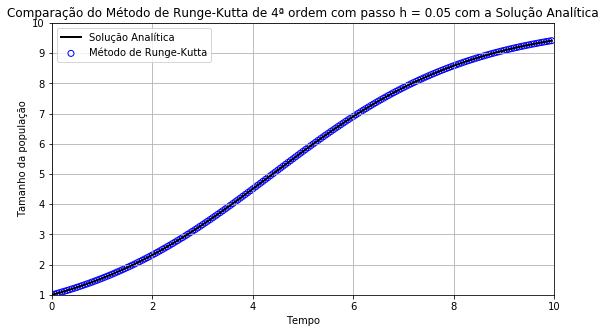

In [19]:
 # Arrays das variaveis independentes e dependentes
t_rk4 = np.arange(0, 10, h0)
y_rk4 = np.zeros(t_rk4.size, dtype=float)
y_rk4[0] = 1 # condicao inicial
y_anal = (K0*y_rk4[0]*np.exp(r0*t_rk4))/(K0+y_rk4[0]*(np.exp(r0*t_rk4)-1))

# Execucao do metodo
for i in range(1, y_rk4.size):
	k1 = h0*f(r0, y_rk4[i-1], K0)
	k2 = h0*f(r0, y_rk4[i-1] + k1/2, K0)
	k3 = h0*f(r0, y_rk4[i-1] + k2/2, K0)
	k4 = h0*f(r0, y_rk4[i-1] + k3, K0)
	y_rk4[i] = y_rk4[i-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

# Plot das curvas
plt.figure(3, figsize=(9, 5))
plt.plot(t_rk4, y_anal, 'k', linewidth=2, label='Solução Analítica')
plt.scatter(t_rk4, y_rk4, facecolors='none', edgecolors='b', label='Método de Runge-Kutta')
plt.xlabel('Tempo')
plt.ylabel('Tamanho da população')
plt.title('Comparação do Método de Runge-Kutta de 4ª ordem com passo h = 0.05 com a Solução Analítica')
plt.legend()
plt.grid(True)
plt.axis([0, 10, 1, 10])
plt.show()

### Item d)
#### Comparação dos métodos
---

In [20]:
# Computação dos erros em cada ponto de cada método comparado com a solução analítica
erro_euler = y_euler - (K0*y_euler[0]*np.exp(r0*t_euler))/(K0+y_euler[0]*(np.exp(r0*t_euler)-1))
erro_rk4 = y_rk4 - (K0*y_rk4[0]*np.exp(r0*t_rk4))/(K0+y_rk4[0]*(np.exp(r0*t_rk4)-1))

print("O erro máximo ao quadrado do Método de Euler foi: %.12f" %max(erro_euler**2))
print("O erro máximo ao quadrado do Método de Runge-Kutta de 4ª ordem foi: %.12f" %max(erro_rk4**2))

O erro máximo ao quadrado do Método de Euler foi: 0.000967197358
O erro máximo ao quadrado do Método de Runge-Kutta de 4ª ordem foi: 0.000000000000


## Discussão

Ambos os métodos conseguem aferir com precisão e exatidão o valor aproximado da solução da equação diferencial ordinária dada. É posssível concluir isso a partir do cálculo do erro ao quadrado com relação à solução analítica. Entretanto, é necessário notar que, como se tratam de métodos de passo um, a escolha de um passo adequado é essencial para a obtenção de uma solução aceitável. Vide os estudos feitos usando passos diferentes em que alguns deles divergiram substancialmente da solução analítica.

Como era de se esperar, o método de Runge-Kutta de 4ª ordem, por considerar mais termos da expansão de Taylor se aproxima mais da solução analítica se comparado com o método de Euler. Porém, ele exige mais cálculos de pontos. Dependendo da aplicação, o método de Euler ainda pode satisfazer as condições apropriadas. Cabe ao usuário identificar se os cálculos a mais exigidos pelo método de Runge-Kutta trazem um retorno em exatidão condizente.

## Referências
 
[1] RUGGIERO, M., LOPES, V. Cálculo Numérico - Aspectos Teóricos e Computacionais. Segunda Edição. Pearson: 1997